In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import pandas as pd

In [23]:
import tensorflow as tf

In [24]:
from keras import models
from keras import layers

In [3]:
import cv2
import pytube
from PIL import Image

In [4]:
import os
import csv
from tqdm import tqdm

In [5]:
import skvideo.io

In [6]:
import imageio

In [7]:
import imagehash

In [8]:
import re

In [9]:
import humanize

In [10]:
from skimage.measure import compare_mse, compare_ssim
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import hamming

# Data

In [10]:
def folder_size(path='.'):
    total = 0
    for entry in os.scandir(path):
        if entry.is_file():
            total += entry.stat().st_size
        elif entry.is_dir():
            total += folder_size(entry.path)
    return humanize.naturalsize(total)

In [11]:
def video_to_image(video_loc, img_folder, dataset_type):
    raw = {}
    
    tqdm.write('Reading in video file ...')
    cap = skvideo.io.vread(video_loc)
    
    tqdm.write('Constructing dataset ...')
    for idx, frame in enumerate(tqdm(cap)):
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        raw[idx] = [img_path, idx]
        skvideo.io.vwrite(img_path, frame)
    
    raw_df = pd.DataFrame.from_dict(raw, orient='index')
    raw_df.columns = ['img_path', 'img_index']
    
    tqdm.write('Writing raw to csv')
    raw_df.to_csv(os.path.join(data_path, dataset_type+'_raw.csv'), index=False)
    
    return 'Done'

In [11]:
save_path = '/home/idies/workspace/Storage/Cong/persistent/video/data'
data_path = '/home/idies/workspace/Storage/Cong/persistent/video/data'
result_path = '/home/idies/workspace/Storage/Cong/persistent/video/result'

## Video 1

In [ ]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=Po4yoytAdDg'
pytube.YouTube(video_url).streams.first().download(save_path)

In [ ]:
data_path = './data'
train_video = os.path.join(data_path, 'train1.webm')
train_imgs = os.path.join(data_path, 'images1')

In [14]:
video_to_image(train_video, train_imgs, 'train1')

Reading in video file ...


  0%|          | 1/13629 [00:00<36:06,  6.29it/s]

Constructing dataset ...


100%|██████████| 13629/13629 [18:35<00:00, 12.22it/s]


Writing raw to csv


'Done'

In [25]:
train_df = pd.read_csv(os.path.join(data_path, 'train1_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images/0.jpg          0
1  ./data/images/1.jpg          1
2  ./data/images/2.jpg          2
3  ./data/images/3.jpg          3
4  ./data/images/4.jpg          4

In [32]:
def change_name(old):
    return re.sub('images', 'images1', old)

In [35]:
train_df['img_path'] = train_df['img_path'].apply(change_name)

In [36]:
train_df.head()

img_path  img_index
0  ./data/images1/0.jpg          0
1  ./data/images1/1.jpg          1
2  ./data/images1/2.jpg          2
3  ./data/images1/3.jpg          3
4  ./data/images1/4.jpg          4

In [37]:
train_df.to_csv(os.path.join(data_path, 'train1_raw.csv'), index=False)

In [160]:
train_df = pd.read_csv(os.path.join(data_path, 'train1_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images1/0.jpg          0
1  ./data/images1/1.jpg          1
2  ./data/images1/2.jpg          2
3  ./data/images1/3.jpg          3
4  ./data/images1/4.jpg          4

In [161]:
train_df.shape

(13629, 2)

shape: (356, 640, 3)


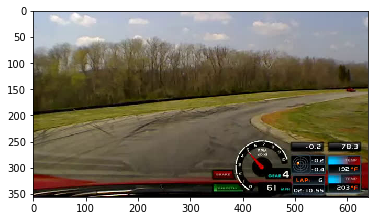

shape: (356, 640, 3)


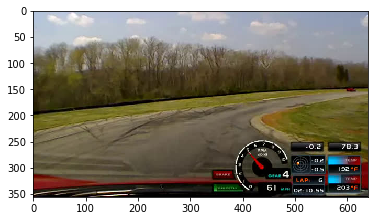

shape: (356, 640, 3)


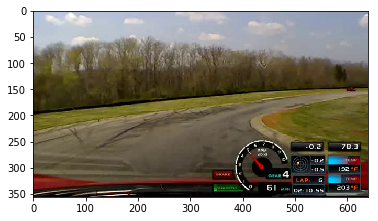

In [162]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [68]:
folder_size('./data/images1')

'376.0 MB'

## Video 2

In [ ]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=JBrvEroV0ZE'
pytube.YouTube(video_url).streams.first().download(save_path)

In [8]:
data_path = './data'
train_video = os.path.join(data_path, 'train2.mp4')
train_imgs = os.path.join(data_path, 'images2')

In [9]:
video_to_image(train_video, train_imgs, 'train2')

Reading in video file ...


  0%|          | 1/4111 [00:00<09:48,  6.99it/s]

Constructing dataset ...


100%|██████████| 4111/4111 [07:03<00:00,  9.71it/s]


Writing raw to csv


'Done'

In [163]:
train_df = pd.read_csv(os.path.join(data_path, 'train2_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images2/0.jpg          0
1  ./data/images2/1.jpg          1
2  ./data/images2/2.jpg          2
3  ./data/images2/3.jpg          3
4  ./data/images2/4.jpg          4

In [164]:
train_df.shape

(4111, 2)

shape: (720, 1280, 3)


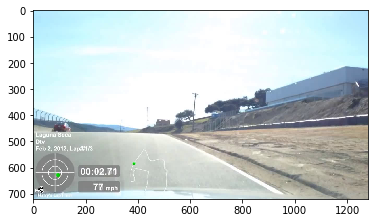

shape: (720, 1280, 3)


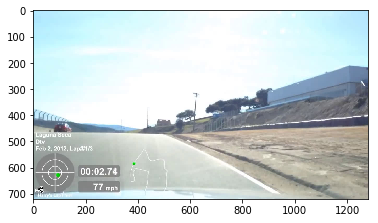

shape: (720, 1280, 3)


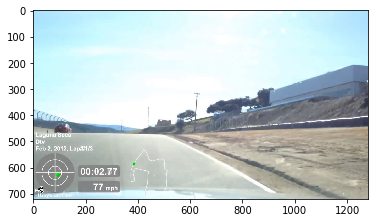

In [165]:
for i in range(524, 527):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [44]:
folder_size('./data/images2')

'207.3 MB'

## Video 3

In [51]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=LPA699eLKcY'
pytube.YouTube(video_url).streams.first().download(save_path)

In [52]:
data_path = './data'
train_video = os.path.join(data_path, 'train3.mp4')
train_imgs = os.path.join(data_path, 'images3')

In [53]:
video_to_image(train_video, train_imgs, 'train3')

Reading in video file ...


  0%|          | 1/4770 [00:00<09:25,  8.43it/s]

Constructing dataset ...


100%|██████████| 4770/4770 [06:50<00:00, 11.63it/s]


Writing raw to csv


'Done'

In [167]:
train_df = pd.read_csv(os.path.join(data_path, 'train3_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images3/0.jpg          0
1  ./data/images3/1.jpg          1
2  ./data/images3/2.jpg          2
3  ./data/images3/3.jpg          3
4  ./data/images3/4.jpg          4

In [168]:
train_df.shape

(4770, 2)

shape: (404, 1280, 3)


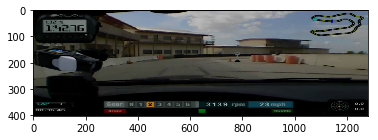

shape: (404, 1280, 3)


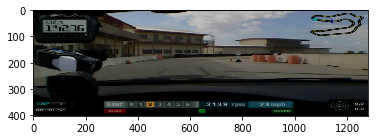

shape: (404, 1280, 3)


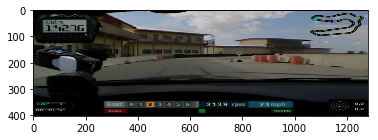

In [169]:
for i in range(350,353):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [61]:
folder_size('./data/images3')

'201.6 MB'

## Video 4

In [62]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=Y1INs-axyhc'
pytube.YouTube(video_url).streams.first().download(save_path)

In [63]:
data_path = './data'
train_video = os.path.join(data_path, 'train4.mp4')
train_imgs = os.path.join(data_path, 'images4')

In [64]:
video_to_image(train_video, train_imgs, 'train4')

Reading in video file ...


  0%|          | 1/5311 [00:00<12:37,  7.01it/s]

Constructing dataset ...


100%|██████████| 5311/5311 [10:08<00:00,  8.73it/s]


Writing raw to csv


'Done'

In [170]:
train_df = pd.read_csv(os.path.join(data_path, 'train4_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images4/0.jpg          0
1  ./data/images4/1.jpg          1
2  ./data/images4/2.jpg          2
3  ./data/images4/3.jpg          3
4  ./data/images4/4.jpg          4

In [171]:
train_df.shape

(5311, 2)

shape: (720, 1280, 3)


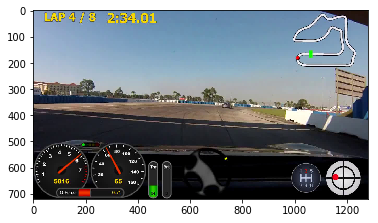

shape: (720, 1280, 3)


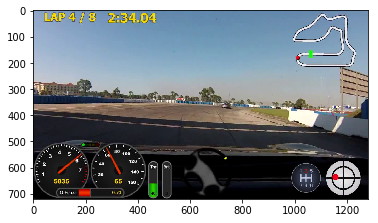

shape: (720, 1280, 3)


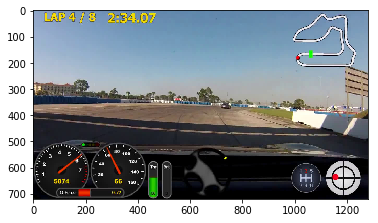

In [172]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [68]:
folder_size('./data/images4')

'413.5 MB'

## Video 5

In [69]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=Jeh18G0D_Hs'
pytube.YouTube(video_url).streams.first().download(save_path)

In [70]:
data_path = './data'
train_video = os.path.join(data_path, 'train5.mp4')
train_imgs = os.path.join(data_path, 'images5')

In [71]:
video_to_image(train_video, train_imgs, 'train5')

Reading in video file ...


  0%|          | 1/4394 [00:00<08:09,  8.97it/s]

Constructing dataset ...


100%|██████████| 4394/4394 [08:03<00:00,  9.09it/s]


Writing raw to csv


'Done'

In [173]:
train_df = pd.read_csv(os.path.join(data_path, 'train5_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images5/0.jpg          0
1  ./data/images5/1.jpg          1
2  ./data/images5/2.jpg          2
3  ./data/images5/3.jpg          3
4  ./data/images5/4.jpg          4

In [174]:
train_df.shape

(4394, 2)

shape: (720, 1280, 3)


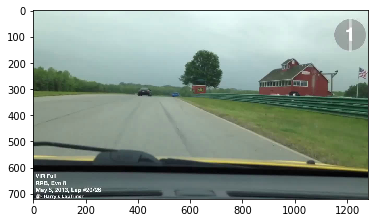

shape: (720, 1280, 3)


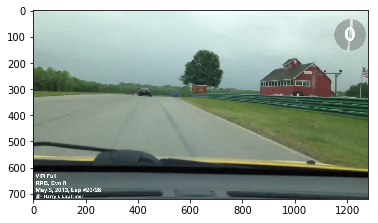

shape: (720, 1280, 3)


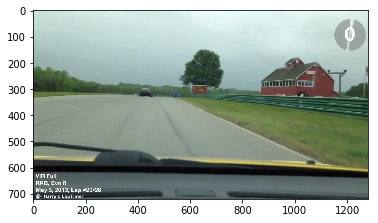

In [175]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [75]:
folder_size('./data/images5')

'255.1 MB'

## Video 6

In [76]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=HqYIxHP71iA'
pytube.YouTube(video_url).streams.first().download(save_path)

In [77]:
data_path = './data'
train_video = os.path.join(data_path, 'train6.mp4')
train_imgs = os.path.join(data_path, 'images6')

In [78]:
video_to_image(train_video, train_imgs, 'train6')

Reading in video file ...


  0%|          | 1/4259 [00:00<08:37,  8.22it/s]

Constructing dataset ...


100%|██████████| 4259/4259 [07:45<00:00,  9.15it/s]


Writing raw to csv


'Done'

In [176]:
train_df = pd.read_csv(os.path.join(data_path, 'train6_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images6/0.jpg          0
1  ./data/images6/1.jpg          1
2  ./data/images6/2.jpg          2
3  ./data/images6/3.jpg          3
4  ./data/images6/4.jpg          4

In [177]:
train_df.shape

(4259, 2)

shape: (720, 1280, 3)


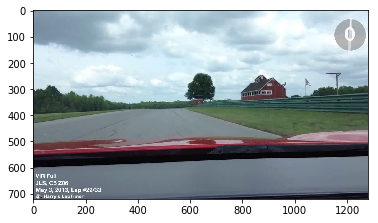

shape: (720, 1280, 3)


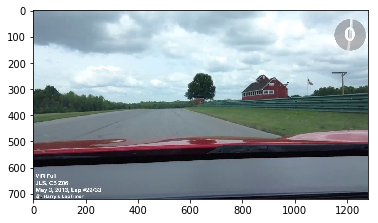

shape: (720, 1280, 3)


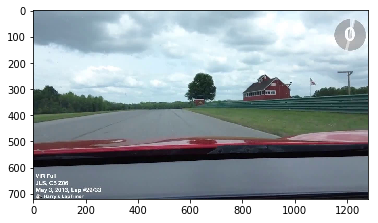

In [178]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [99]:
folder_size('./data/images6')

'297.0 MB'

## Video 7

In [92]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=Mvwr2UxyDXU'
pytube.YouTube(video_url).streams.first().download(save_path)

In [93]:
data_path = './data'
train_video = os.path.join(data_path, 'train7.mp4')
train_imgs = os.path.join(data_path, 'images7')

In [94]:
video_to_image(train_video, train_imgs, 'train7')

Reading in video file ...


  0%|          | 0/8399 [00:00<?, ?it/s]

Constructing dataset ...


100%|██████████| 8399/8399 [17:56<00:00,  7.80it/s]


Writing raw to csv


'Done'

In [95]:
train_df = pd.read_csv(os.path.join(data_path, 'train7_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images7/0.jpg          0
1  ./data/images7/1.jpg          1
2  ./data/images7/2.jpg          2
3  ./data/images7/3.jpg          3
4  ./data/images7/4.jpg          4

In [96]:
train_df.shape

(8399, 2)

shape: (720, 1280, 3)


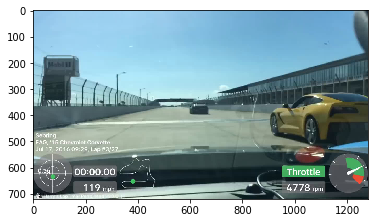

shape: (720, 1280, 3)


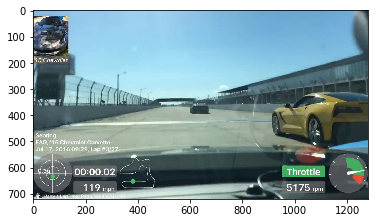

shape: (720, 1280, 3)


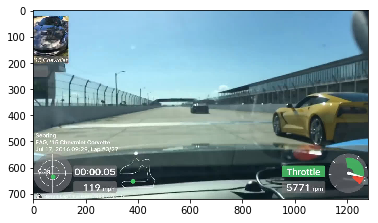

In [97]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [ ]:
folder_size('./data/images7')

## Video 8

In [90]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=3jTxJISN5SE'
pytube.YouTube(video_url).streams.first().download(save_path)

In [92]:
data_path = './data'
train_video = os.path.join(data_path, 'train8.webm')
train_imgs = os.path.join(data_path, 'images8')

In [93]:
video_to_image(train_video, train_imgs, 'train8')

Reading in video file ...


  0%|          | 2/4544 [00:00<04:57, 15.27it/s]

Constructing dataset ...


100%|██████████| 4544/4544 [04:31<00:00, 16.71it/s]


Writing raw to csv


'Done'

In [182]:
train_df = pd.read_csv(os.path.join(data_path, 'train8_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images8/0.jpg          0
1  ./data/images8/1.jpg          1
2  ./data/images8/2.jpg          2
3  ./data/images8/3.jpg          3
4  ./data/images8/4.jpg          4

In [183]:
train_df.shape

(4544, 2)

shape: (360, 480, 3)


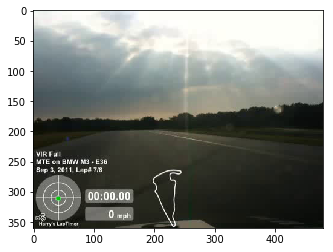

shape: (360, 480, 3)


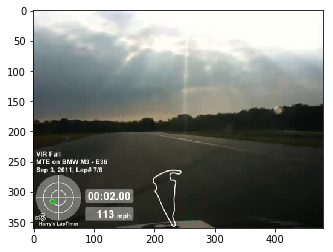

shape: (360, 480, 3)


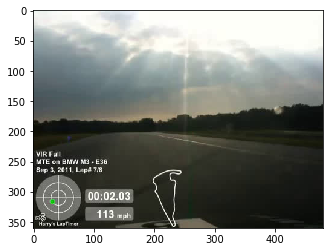

In [184]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [97]:
folder_size('./data/images8')

'65.0 MB'

## Video 9

In [98]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=4M8fkNRnBOc'
pytube.YouTube(video_url).streams.first().download(save_path)

In [99]:
data_path = './data'
train_video = os.path.join(data_path, 'train9.mp4')
train_imgs = os.path.join(data_path, 'images9')

In [100]:
video_to_image(train_video, train_imgs, 'train9')

Reading in video file ...


  0%|          | 1/3974 [00:00<08:02,  8.24it/s]

Constructing dataset ...


100%|██████████| 3974/3974 [07:04<00:00,  9.37it/s]


Writing raw to csv


'Done'

In [185]:
train_df = pd.read_csv(os.path.join(data_path, 'train9_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images9/0.jpg          0
1  ./data/images9/1.jpg          1
2  ./data/images9/2.jpg          2
3  ./data/images9/3.jpg          3
4  ./data/images9/4.jpg          4

In [186]:
train_df.shape

(3974, 2)

shape: (720, 1280, 3)


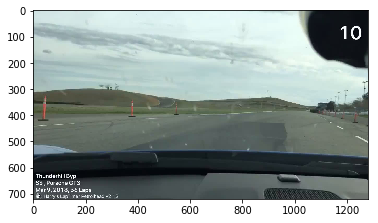

shape: (720, 1280, 3)


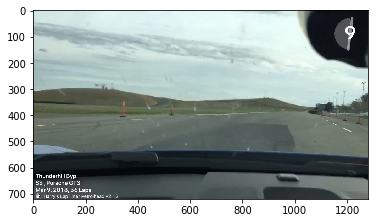

shape: (720, 1280, 3)


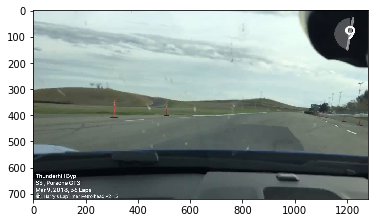

In [187]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [104]:
folder_size('./data/images9')

'222.4 MB'

## Video 10

In [105]:
save_path = './data'
video_url = 'https://www.youtube.com/watch?v=mCHBv0zNFbE'
pytube.YouTube(video_url).streams.first().download(save_path)

In [106]:
data_path = './data'
train_video = os.path.join(data_path, 'train10.mp4')
train_imgs = os.path.join(data_path, 'images10')

In [107]:
video_to_image(train_video, train_imgs, 'train10')

Reading in video file ...


  0%|          | 1/5254 [00:00<12:25,  7.05it/s]

Constructing dataset ...


100%|██████████| 5254/5254 [09:49<00:00,  8.91it/s]


Writing raw to csv


'Done'

In [188]:
train_df = pd.read_csv(os.path.join(data_path, 'train10_raw.csv'))
train_df.head()

img_path  img_index
0  ./data/images10/0.jpg          0
1  ./data/images10/1.jpg          1
2  ./data/images10/2.jpg          2
3  ./data/images10/3.jpg          3
4  ./data/images10/4.jpg          4

In [189]:
train_df.shape

(5254, 2)

shape: (712, 1280, 3)


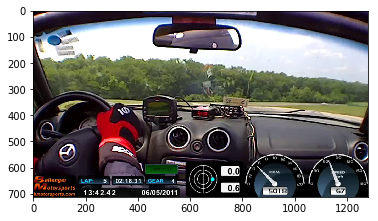

shape: (712, 1280, 3)


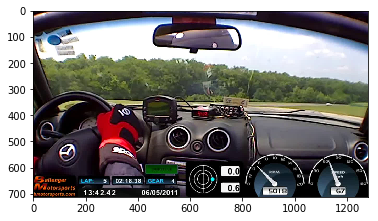

shape: (712, 1280, 3)


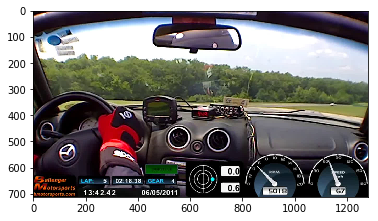

In [190]:
for i in range(3):
    img = imread(train_df['img_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

In [111]:
folder_size('./data/images10')

'432.9 MB'

# Preprocessing

In [12]:
def image_crop(h1, h2, l1, l2, original):
    return original[h1:h2, l1:l2, :]

In [13]:
def change_brightness(image, bright_factor):
    """
    Augments the brightness of the image by multiplying the saturation by a uniform random variable
    Input: image (RGB)
    returns: image with brightness augmentation
    """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # perform brightness augmentation only on the second channel
    hsv_image[:,:,2] = hsv_image[:,:,2] * bright_factor
    
    # change back to RGB
    image_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return image_rgb

In [14]:
bright_factor = 0.2 + np.random.uniform()
bright_factor

1.0426016233980548

## Video 1

In [216]:
train_df = pd.read_csv(os.path.join(data_path, 'train1_raw.csv'))
train_df.shape

(13629, 2)

In [ ]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (200, 640, 3)


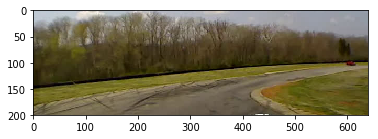

new shape: (200, 640, 3)


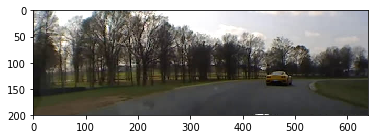

new shape: (200, 640, 3)


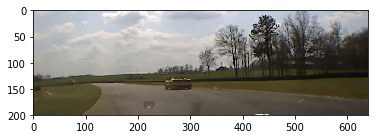

In [219]:
for i in [0, 1000, 10000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(50, 250, 0, 640, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 2

In [220]:
train_df = pd.read_csv(os.path.join(data_path, 'train2_raw.csv'))
train_df.shape

(4111, 2)

shape: (720, 1280, 3)


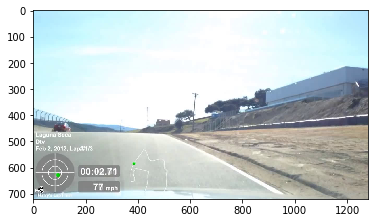

In [221]:
img = imread(train_df['img_path'][524])
print('shape:', img.shape)
imshow(img);

new shape: (300, 1280, 3)


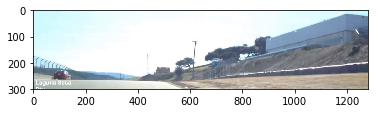

new shape: (300, 1280, 3)


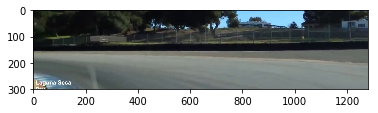

new shape: (300, 1280, 3)


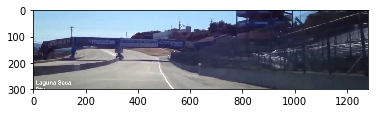

In [225]:
for i in [524, 2000, 4000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(200, 500, 0, 1280, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 3

In [226]:
train_df = pd.read_csv(os.path.join(data_path, 'train3_raw.csv'))
train_df.shape

(4770, 2)

shape: (404, 1280, 3)


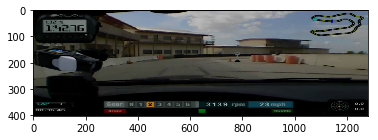

In [228]:
img = imread(train_df['img_path'][350])
print('shape:', img.shape)
imshow(img);

new shape: (250, 870, 3)


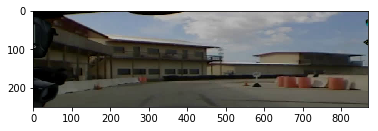

new shape: (250, 870, 3)


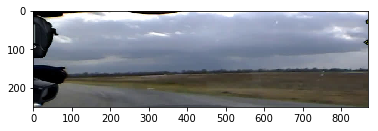

new shape: (250, 870, 3)


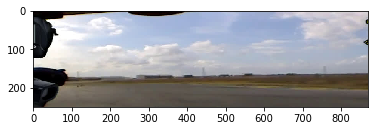

In [235]:
for i in [350, 2000, 4000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(0, 250, 200, 1070, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 4

In [236]:
train_df = pd.read_csv(os.path.join(data_path, 'train4_raw.csv'))
train_df.shape

(5311, 2)

shape: (720, 1280, 3)


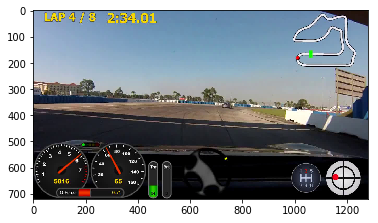

In [237]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (460, 1000, 3)


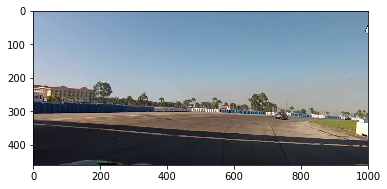

new shape: (460, 1000, 3)


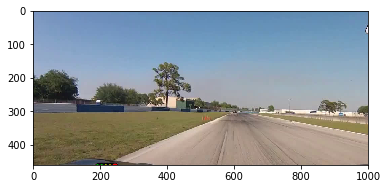

new shape: (460, 1000, 3)


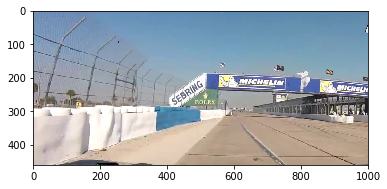

In [249]:
for i in [0, 2500, 5000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(50, 510, 0, 1000, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 5

In [250]:
train_df = pd.read_csv(os.path.join(data_path, 'train5_raw.csv'))
train_df.shape

(4394, 2)

shape: (720, 1280, 3)


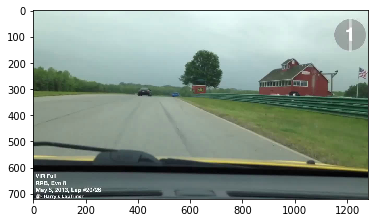

In [251]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (410, 1280, 3)


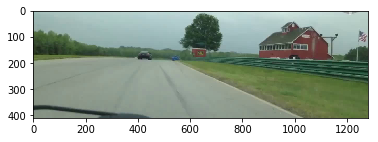

new shape: (410, 1280, 3)


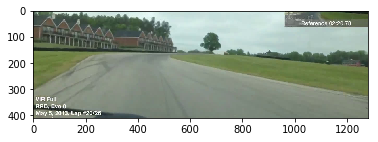

new shape: (410, 1280, 3)


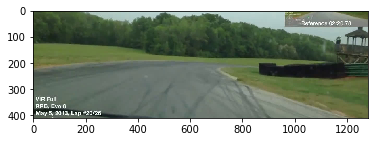

In [257]:
for i in [0, 2000, 4000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(140, 550, 0, 1280, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 6

In [258]:
train_df = pd.read_csv(os.path.join(data_path, 'train6_raw.csv'))
train_df.shape

(4259, 2)

shape: (720, 1280, 3)


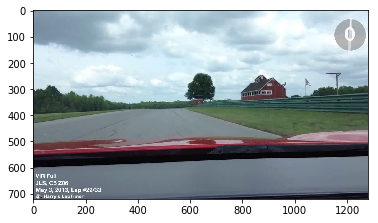

In [269]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (330, 1280, 3)


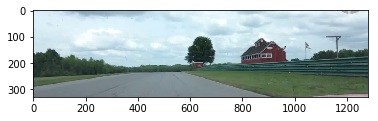

new shape: (330, 1280, 3)


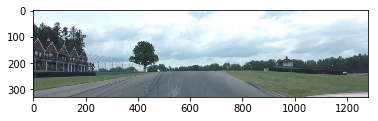

new shape: (330, 1280, 3)


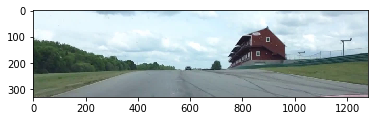

In [274]:
for i in [0, 2000, 4000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(140, 470, 0, 1280, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 7

In [100]:
train_df = pd.read_csv(os.path.join(data_path, 'train7_raw.csv'))
train_df.shape

(8399, 2)

shape: (720, 1280, 3)


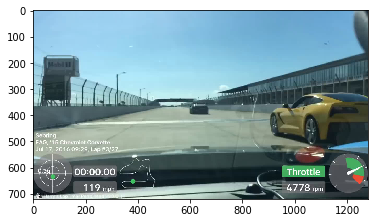

In [101]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (400, 1280, 3)


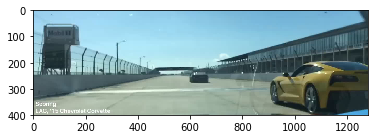

new shape: (400, 1280, 3)


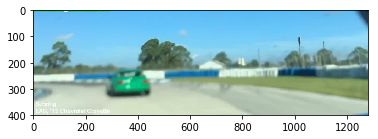

new shape: (400, 1280, 3)


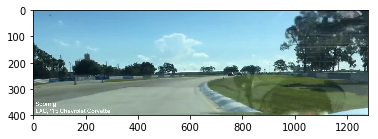

In [108]:
for i in [0, 1000, 2000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(120, 520, 0, 1280, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 8

In [15]:
train_df = pd.read_csv(os.path.join(data_path, 'train8_raw.csv'))
train_df.shape

(4544, 2)

shape: (360, 480, 3)


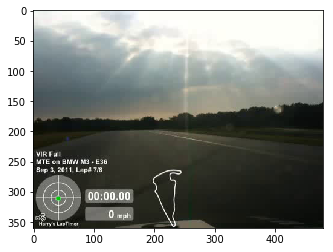

In [16]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (130, 480, 3)


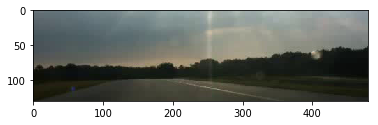

new shape: (130, 480, 3)


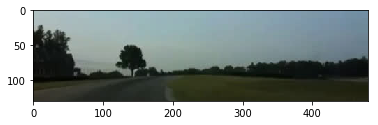

new shape: (130, 480, 3)


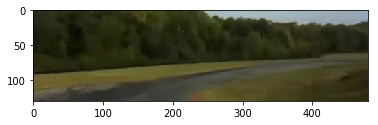

In [17]:
for i in [0, 2000, 4000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(100, 230, 0, 480, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

In [21]:
bright_factor = 0.2 + np.random.uniform()
bright_factor

0.8588582572473025

new shape: (130, 480, 3)


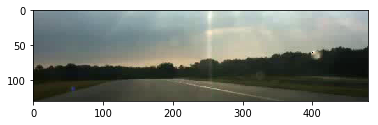

new shape: (130, 480, 3)


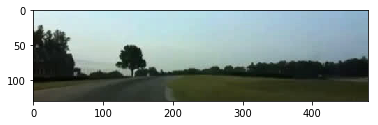

new shape: (130, 480, 3)


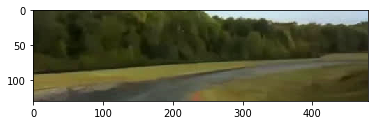

In [26]:
for i in [0, 2000, 4000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(100, 230, 0, 480, img)
    new_img = change_brightness(new_img, 1.25)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 9

In [291]:
train_df = pd.read_csv(os.path.join(data_path, 'train9_raw.csv'))
train_df.shape

(3974, 2)

shape: (720, 1280, 3)


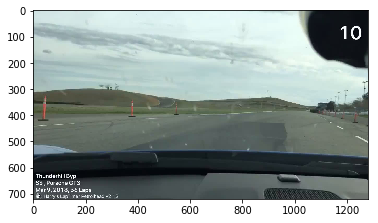

In [292]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (350, 1280, 3)


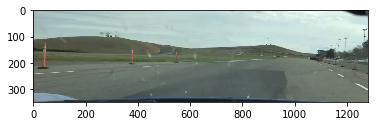

new shape: (350, 1280, 3)


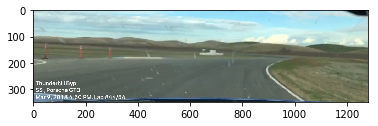

new shape: (350, 1280, 3)


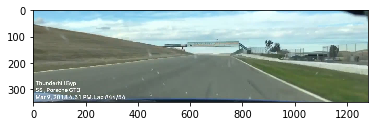

In [296]:
for i in [0, 1500, 3000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(200, 550, 0, 1280, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

## Video 10

In [297]:
train_df = pd.read_csv(os.path.join(data_path, 'train10_raw.csv'))
train_df.shape

(5254, 2)

shape: (712, 1280, 3)


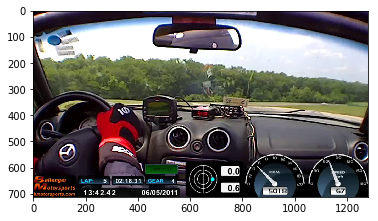

In [298]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

new shape: (240, 1280, 3)


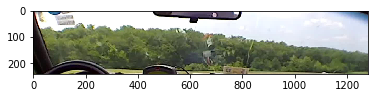

new shape: (240, 1280, 3)


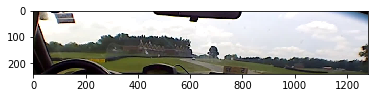

new shape: (240, 1280, 3)


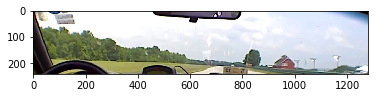

In [302]:
for i in [0, 2500, 5000]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(120, 360, 0, 1280, img)
    print('new shape:', new_img.shape)
    plt.imshow(new_img)
    plt.show()

# FPS

In [46]:
def get_FPS(video_loc):
    video = cv2.VideoCapture(video_loc)
    fps = video.get(cv2.CAP_PROP_FPS)
    return fps

In [136]:
for i in range(1, 11):
    if i in [1, 8]:
        video_path = os.path.join(data_path, 'train'+str(i)+'.webm')
    else:
        video_path = os.path.join(data_path, 'train'+str(i)+'.mp4')
    print('FPS of video', i, ':', get_FPS(video_path))

FPS of video 1 : 1000.0
FPS of video 2 : 30.00007297512278
FPS of video 3 : 29.97624523962143
FPS of video 4 : 29.97002997002997
FPS of video 5 : 30.0
FPS of video 6 : 29.97002997002997
FPS of video 7 : 29.00000007672871
FPS of video 8 : 30.0
FPS of video 9 : 29.000003405469283
FPS of video 10 : 29.97002997002997


In [64]:
video = cv2.VideoCapture(os.path.join(data_path, 'train10.mp4'))
video.get(cv2.CAP_PROP_FRAME_COUNT)

5254.0

# Image Similarity

In [14]:
def get_histogram(img):
    h, w = img.shape
    hist = [0.0] * 256
    for i in range(h):
        for j in range(w):
            hist[img[i, j]] += 1
    return np.array(hist) / (h * w)

In [15]:
def normalize_exposure(img):
    '''
    Normalize the exposure of an image.
    '''
    img = img.astype(int)
    hist = get_histogram(img)
    # get the sum of vals accumulated by each position in hist
    cdf = np.array([sum(hist[:i+1]) for i in range(len(hist))])
    # determine the normalization values for each unit of the cdf
    sk = np.uint8(255 * cdf)
    # normalize each position in the output image
    h, w = img.shape
    normalized = np.zeros_like(img)
    for i in range(0, h):
        for j in range(0, w):
            normalized[i, j] = sk[img[i, j]]
    return normalized.astype(int)

In [16]:
def compare_emd(img1, img2):
    img1 = normalize_exposure(img1)
    img2 = normalize_exposure(img2)
    return wasserstein_distance(get_histogram(img1), get_histogram(img2))

In [17]:
def compare_orb(img1, img2, threshold):
    orb = cv2.ORB_create()
    kp_1, desc_1 = orb.detectAndCompute(img1, None)
    kp_2, desc_2 = orb.detectAndCompute(img2, None)
    if desc_1 is None or desc_2 is None:
        return 0
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(desc_1, desc_2)
    if len(matches) == 0:
        return 0
    similar = [i for i in matches if i.distance < threshold]
    return len(similar) / len(matches)

In [29]:
def dhash(img, hashSize=8):
    # resize the input image, adding a single column (row) so we can compute the gradient
    resized_col = cv2.resize(img, (hashSize+1,hashSize))
    resized_row = cv2.resize(img, (hashSize,hashSize+1))
 
    # compute the (relative) gradient between adjacent pixels
    diff_col = resized_col[:,1:] > resized_col[:,:-1]
    diff_row = resized_row[1:,:] > resized_row[:-1,:]

    # convert the difference image to a hash
    return sum([2**i for (i, v) in enumerate(np.append(diff_col.flatten(), diff_row.flatten())) if v])

In [30]:
def compare_dhash(img1, img2, hashSize=8):
    h1 = [int(d) for d in str(int(dhash(img1)))]
    h2 = [int(d) for d in str(int(dhash(img2)))]
    
    if len(h1) == len(h2):
        dHash = hamming(h1, h2)
    else:
        dHash = 1
    return dHash

In [35]:
def get_similar_image(img, image_df, method, ascending, prior, h1, h2, l1, l2):
    results_dict = {}
    img = image_crop(h1, h2, l1, l2, img)
    if method == 'EMD' or method == 'ORB' or method == 'dHash':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
    for i in range(prior, image_df.shape[0]):
        temp_img = imread(image_df['img_path'][i])
        temp_img = image_crop(h1, h2, l1, l2, temp_img)
        if method == 'MSE':
            results_dict[i] = [image_df['img_path'][i], i, compare_mse(img, temp_img)]
        elif method == 'EMD':
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY)
            results_dict[i] = [image_df['img_path'][i], i, compare_emd(img, temp_img)]
        elif method == 'ORB':
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY)
            results_dict[i] = [image_df['img_path'][i], i, compare_orb(img, temp_img, threshold)]
        elif method == 'dHash':
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_RGB2GRAY)
            results_dict[i] = [image_df['img_path'][i], i, compare_dhash(img, temp_img)]
        else:
            results_dict[i] = [image_df['img_path'][i], i, compare_ssim(img, temp_img, multichannel=True)]
    
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    results_df.columns = ['img_path', 'img_index', method]
    results_df = results_df.sort_values(by=method, ascending=ascending)
    return results_df

In [32]:
def weighted_index(df, n, method, ascending):
    temp = df.copy()[:n]
    if ascending:
        temp['weight'] = (1/temp[method]) / sum(1/temp[method])
    else:
        temp['weight'] = temp[method] / sum(temp[method])
    return sum(temp['img_index']*temp['weight'])

In [33]:
prior_time = 90
sample_frac = 0.8
threshold = 70

In [47]:
def lap_time(initial_idx, sample, sample_frac, fps, topn, df, method, ascending, h1, h2, l1, l2, seed):
    np.random.seed(seed)
    results_dict = {}
    prior = initial_idx + np.floor(prior_time * fps).astype(int)
    img_idxs = np.random.choice(np.arange(initial_idx, np.floor(initial_idx+fps).astype(int)), np.round(sample*sample_frac).astype(int), replace=False).tolist() + np.random.choice(np.arange(np.ceil(initial_idx+fps).astype(int), np.floor(initial_idx+2*fps).astype(int)), np.round(sample*(1-sample_frac)).astype(int), replace=False).tolist()
    
    for idx in img_idxs:
        img = imread(df['img_path'][idx])
        similar_imgs = get_similar_image(img, df, method, ascending, prior, h1, h2, l1, l2)
        results_dict[idx] = [df['img_path'][idx], idx, (similar_imgs['img_index'].iloc[0]-idx)/fps, (weighted_index(similar_imgs, topn, method, ascending)-idx)/fps]
    
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    results_df.columns = ['img_path', 'img_index', 'lap_time', 'weighted_lap_time']
    return results_df

## Video 1

In [29]:
train_df = pd.read_csv(os.path.join(data_path, 'train1_raw.csv'))
train_df.shape

(13629, 2)

shape: (356, 640, 3)


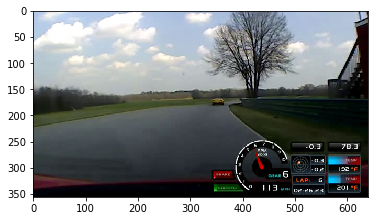

In [30]:
img = imread(train_df['img_path'][470])
print('shape:', img.shape)
imshow(img);

shape: (200, 640, 3)


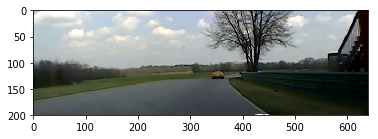

In [140]:
new_img = image_crop(50, 250, 0, 640, img);
print('shape:', new_img.shape)
imshow(new_img);

In [231]:
test = get_similar_image(img, train_df, 'SSIM', False, 4000, 3000, 50, 250, 0, 640)
test.head()

img_path  img_index      SSIM
4929  ./data/images1/4929.jpg       4929  0.586605
4928  ./data/images1/4928.jpg       4928  0.579553
4930  ./data/images1/4930.jpg       4930  0.571342
4931  ./data/images1/4931.jpg       4931  0.565014
4932  ./data/images1/4932.jpg       4932  0.559946

In [241]:
(4929-470) / 30

148.63333333333333

In [242]:
(9135-4929) / 30

140.2

In [243]:
(13433-9135) / 30

143.26666666666668

In [270]:
test = get_similar_image(img, train_df, 'MSE', True, 4000, 3000, 50, 250, 0, 640)
test.head()

img_path  img_index          MSE
4929  ./data/images1/4929.jpg       4929   910.494424
4930  ./data/images1/4930.jpg       4930  1041.567724
4931  ./data/images1/4931.jpg       4931  1437.918180
4928  ./data/images1/4928.jpg       4928  1457.206547
4932  ./data/images1/4932.jpg       4932  1574.463107

In [272]:
(4929-470) / 30

148.63333333333333

In [273]:
(9133-4929) / 30

140.13333333333333

In [274]:
(13432-9133) / 30

143.3

In [141]:
test = get_similar_image(img, train_df, 'EMD', True, 4000, 3000, 50, 250, 0, 640)
test.head()

img_path  img_index       EMD
5760  ./data/images1/5760.jpg       5760  0.000232
5738  ./data/images1/5738.jpg       5738  0.000257
4929  ./data/images1/4929.jpg       4929  0.000259
4928  ./data/images1/4928.jpg       4928  0.000260
9980  ./data/images1/9980.jpg       9980  0.000260

In [146]:
(5760-470) / 30

176.33333333333334

In [147]:
(9980-5760) / 30

140.66666666666666

In [171]:
(13057-9980) / 30

102.56666666666666

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train1_raw.csv'))
img = imread(train_df['img_path'][470])
test = get_similar_image(img, train_df, 'ORB', False, 4000, 3000, 50, 250, 0, 640)
test.head()

In [1]:
(5010-470) / 30

151.33333333333334

In [2]:
(9133-5010) / 30

137.43333333333334

In [3]:
(13537-9133) / 30

146.8

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train1_raw.csv'))
img = imread(train_df['img_path'][470])
test = get_similar_image(img, train_df, 'dHash', True, 4000, 3000, 50, 250, 0, 640)
test.head()

In [64]:
(9223 + 7741 + 10260) / 3

9074.666666666666

In [37]:
(4568-470) / 30

136.6

In [65]:
(9074.6666-4568) / 30

150.22222000000002

In [69]:
(13527 + 13074) / 2

13300.5

In [70]:
(13300.5-9074.6666) / 30

140.86111333333332

shape: (200, 640, 3)


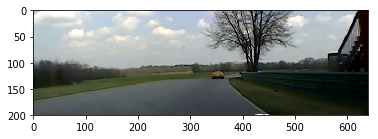

shape: (200, 640, 3)


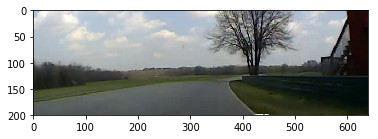

shape: (200, 640, 3)


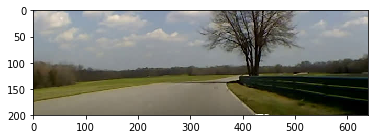

shape: (200, 640, 3)


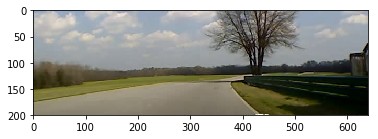

In [32]:
for i in [470, 4929, 9135, 13433]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(50, 250, 0, 640, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 2

In [212]:
train_df = pd.read_csv(os.path.join(data_path, 'train2_raw.csv'))
train_df.shape

(4111, 2)

shape: (720, 1280, 3)


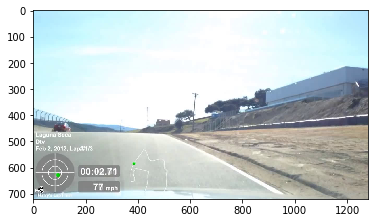

In [213]:
img = imread(train_df['img_path'][524])
print('shape:', img.shape)
imshow(img);

shape: (300, 1280, 3)


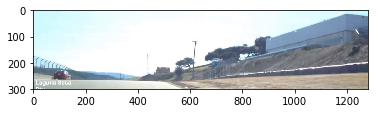

In [214]:
new_img = image_crop(200, 500, 0, 1280, img);
print('shape:', new_img.shape)
imshow(new_img);

In [139]:
test = get_similar_image(img, train_df, 'SSIM', False, 3000, 100, 200, 500, 0, 1280)
test.head()

img_path  img_index      SSIM
4107  ./data/images2/4107.jpg       4107  0.606940
4106  ./data/images2/4106.jpg       4106  0.606250
4108  ./data/images2/4108.jpg       4108  0.605743
4109  ./data/images2/4109.jpg       4109  0.605709
4110  ./data/images2/4110.jpg       4110  0.604535

In [144]:
(4107-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

119.4330428119679

In [145]:
(weighted_index(test, 5, 'SSIM', False)-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

119.46632478045461

In [279]:
test = get_similar_image(img, train_df, 'MSE', True, 3000, 100, 200, 500, 0, 1280)
test.head()

img_path  img_index          MSE
3557  ./data/images2/3557.jpg       3557  4784.680714
3561  ./data/images2/3561.jpg       3561  4784.896579
3559  ./data/images2/3559.jpg       3559  4787.164580
3560  ./data/images2/3560.jpg       3560  4787.199411
3558  ./data/images2/3558.jpg       3558  4793.512488

In [280]:
(3557-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

101.09975407443444

In [282]:
(weighted_index(test, 5, 'MSE', True)-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

101.166428757604

In [215]:
test = get_similar_image(img, train_df, 'EMD', True, 3000, 100, 200, 500, 0, 1280)
test.head()

img_path  img_index       EMD
3186  ./data/images2/3186.jpg       3186  0.001593
3184  ./data/images2/3184.jpg       3184  0.001595
3185  ./data/images2/3185.jpg       3185  0.001595
3183  ./data/images2/3183.jpg       3183  0.001603
3112  ./data/images2/3112.jpg       3112  0.001609

In [217]:
(3186-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

88.73311748966188

In [218]:
(weighted_index(test, 5, 'EMD', True)-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

88.2027612833127

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train2_raw.csv'))
img = imread(train_df['img_path'][524])
test = get_similar_image(img, train_df, 'ORB', False, 3000, 100, 200, 500, 0, 1280)
test.head()
test.to_csv(os.path.join(result_path, 'train2_orb.csv'), index=False)

In [35]:
test = pd.read_csv(os.path.join(result_path, 'train2_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       4104  0.910156
1  /home/idies/workspace/Storage/Cong/persistent/...       4107  0.903101
2  /home/idies/workspace/Storage/Cong/persistent/...       4099  0.900000
3  /home/idies/workspace/Storage/Cong/persistent/...       4105  0.892720
4  /home/idies/workspace/Storage/Cong/persistent/...       4091  0.884921

In [36]:
(4104-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

119.33304305521771

In [38]:
(weighted_index(test, 5, 'ORB', True)-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

119.23841946633486

In [43]:
test = pd.read_csv(os.path.join(result_path, 'train2_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       3609  0.717949
1  /home/idies/workspace/Storage/Cong/persistent/...       3714  0.717949
2  /home/idies/workspace/Storage/Cong/persistent/...       3096  0.743590
3  /home/idies/workspace/Storage/Cong/persistent/...       3992  0.743590
4  /home/idies/workspace/Storage/Cong/persistent/...       3448  0.743590

In [71]:
(3609 + 3714) / 2

3661.5

In [72]:
(3661.5-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

104.5830789345658

In [25]:
img = imread(train_df['img_path'][240])
new_img = image_crop(50, 510, 0, 1000, img)
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
h0 = [int(d) for d in str(int(dhash(new_img)))]
result_dict = {}
for i in range(3000, train_df.shape[0]):
    img = imread(train_df['img_path'][i])
    new_img = image_crop(50, 510, 0, 1000, img)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
    new_h = [int(d) for d in str(int(dhash(new_img)))]
    if len(h0) == len(new_h):
        dHash = hamming(h0, new_h)
    else:
        dHash = 1
    result_dict[i] = [train_df['img_path'][i], i, dHash]
result_df = pd.DataFrame.from_dict(result_dict, orient='index')
result_df.columns = ['img_path', 'img_index', 'dHash']
result_df = result_df.sort_values(by='dHash', ascending=True)

In [48]:
(weighted_index(test, 5, 'dHash', True)-524) / get_FPS(os.path.join(data_path, 'train2.mp4'))

101.63519878135267

shape: (300, 1280, 3)


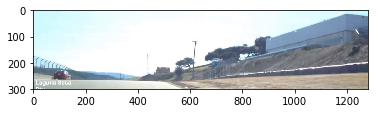

shape: (300, 1280, 3)


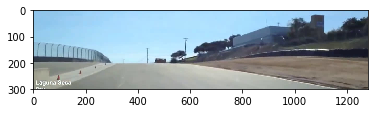

In [143]:
for i in [524, 4107]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(200, 500, 0, 1280, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 3

In [219]:
train_df = pd.read_csv(os.path.join(data_path, 'train3_raw.csv'))
train_df.shape

(4770, 2)

shape: (404, 1280, 3)


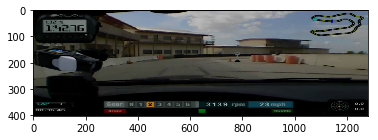

In [220]:
img = imread(train_df['img_path'][350])
print('shape:', img.shape)
imshow(img);

shape: (250, 870, 3)


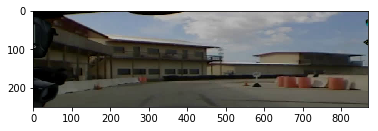

In [221]:
new_img = image_crop(0, 250, 200, 1070, img);
print('shape:', new_img.shape)
imshow(new_img);

In [163]:
test = get_similar_image(img, train_df, 'SSIM', False, 4000, 100, 0, 250, 200, 1070)
test.head()

img_path  img_index      SSIM
4483  ./data/images3/4483.jpg       4483  0.555631
4484  ./data/images3/4484.jpg       4484  0.555115
4482  ./data/images3/4482.jpg       4482  0.553394
4480  ./data/images3/4480.jpg       4480  0.552626
4485  ./data/images3/4485.jpg       4485  0.552528

In [168]:
(4483-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

137.87584025157233

In [169]:
weighted_index(test, 5, 'SSIM', False) / get_FPS(os.path.join(data_path, 'train3.mp4'))

149.54511348412

In [21]:
test = get_similar_image(img, train_df, 'MSE', True, 4000, 100, 0, 250, 200, 1070)
test.head()

img_path  img_index          MSE
4486  ./data/images3/4486.jpg       4486  2281.542130
4484  ./data/images3/4484.jpg       4484  2293.576639
4485  ./data/images3/4485.jpg       4485  2329.960759
4487  ./data/images3/4487.jpg       4487  2347.918271
4483  ./data/images3/4483.jpg       4483  2371.786558

In [22]:
(4486-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

137.97591949685534

In [23]:
(weighted_index(test, 5, 'MSE', True)-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

137.94272835963488

In [222]:
test = get_similar_image(img, train_df, 'EMD', True, 4000, 100, 0, 250, 200, 1070)
test.head()

img_path  img_index       EMD
4448  ./data/images3/4448.jpg       4448  0.000298
4446  ./data/images3/4446.jpg       4446  0.000307
4439  ./data/images3/4439.jpg       4439  0.000315
4455  ./data/images3/4455.jpg       4455  0.000323
4450  ./data/images3/4450.jpg       4450  0.000326

In [223]:
(4448-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

136.7082490566038

In [224]:
(weighted_index(test, 5, 'EMD', True)-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

136.6930096220627

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train3_raw.csv'))
img = imread(train_df['img_path'][350])
test = get_similar_image(img, train_df, 'ORB', False, 4000, 100, 0, 250, 200, 1070)
test.head()
test.to_csv(os.path.join(result_path, 'train3_orb.csv'), index=False)

In [39]:
test = pd.read_csv(os.path.join(result_path, 'train3_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       4079  0.889831
1  /home/idies/workspace/Storage/Cong/persistent/...       4067  0.884211
2  /home/idies/workspace/Storage/Cong/persistent/...       4065  0.883721
3  /home/idies/workspace/Storage/Cong/persistent/...       4087  0.867769
4  /home/idies/workspace/Storage/Cong/persistent/...       4342  0.865248

In [40]:
(4079-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

124.39850188679246

In [41]:
(weighted_index(test, 5, 'ORB', True)-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

126.06087446556955

In [49]:
test = pd.read_csv(os.path.join(result_path, 'train3_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       4486  0.717949
1  /home/idies/workspace/Storage/Cong/persistent/...       4466  0.743590
2  /home/idies/workspace/Storage/Cong/persistent/...       4475  0.769231
3  /home/idies/workspace/Storage/Cong/persistent/...       4470  0.769231
4  /home/idies/workspace/Storage/Cong/persistent/...       4502  0.769231

In [50]:
(4486-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

137.97591949685534

In [51]:
(weighted_index(test, 5, 'dHash', True)-350) / get_FPS(os.path.join(data_path, 'train3.mp4'))

137.7688734171301

shape: (250, 870, 3)


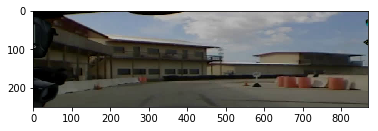

shape: (250, 870, 3)


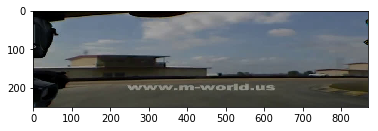

In [165]:
for i in [350, 4483]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(0, 250, 200, 1070, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 4

In [19]:
train_df = pd.read_csv(os.path.join(data_path, 'train4_raw.csv'))
train_df.shape

(5311, 2)

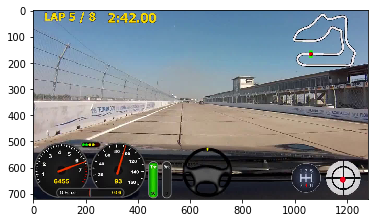

In [226]:
img = imread(train_df['img_path'][240])
imshow(img);

shape: (460, 1000, 3)


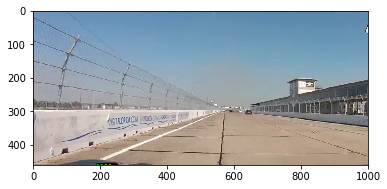

In [227]:
new_img = image_crop(50, 510, 0, 1000, img);
print('shape:', new_img.shape)
imshow(new_img);

In [206]:
test = get_similar_image(img, train_df, 'SSIM', False, 2000, 100, 50, 510, 0, 1000)
test.head()

img_path  img_index      SSIM
5059  ./data/images4/5059.jpg       5059  0.726956
5058  ./data/images4/5058.jpg       5058  0.723660
5055  ./data/images4/5055.jpg       5055  0.715393
5057  ./data/images4/5057.jpg       5057  0.713481
5069  ./data/images4/5069.jpg       5069  0.710859

In [208]:
(5059-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

160.79396666666668

In [216]:
(weighted_index(test, 5, 'SSIM', False) - 240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

160.8139866666667

In [26]:
test = get_similar_image(img, train_df, 'MSE', True, 2000, 100, 50, 510, 0, 1000)
test.head()

img_path  img_index         MSE
5069  ./data/images4/5069.jpg       5069  422.867607
5059  ./data/images4/5059.jpg       5059  432.166180
5066  ./data/images4/5066.jpg       5066  432.653926
5067  ./data/images4/5067.jpg       5067  458.969099
5060  ./data/images4/5060.jpg       5060  459.356007

In [27]:
(5069-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

161.12763333333334

In [28]:
(weighted_index(test, 5, 'MSE', True)-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

160.9687568060169

In [228]:
test = get_similar_image(img, train_df, 'EMD', True, 2000, 100, 50, 510, 0, 1000)
test.head()

img_path  img_index       EMD
5135  ./data/images4/5135.jpg       5135  0.000142
5061  ./data/images4/5061.jpg       5061  0.000164
5079  ./data/images4/5079.jpg       5079  0.000171
5060  ./data/images4/5060.jpg       5060  0.000172
5059  ./data/images4/5059.jpg       5059  0.000172

In [229]:
(5135-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

163.32983333333334

In [230]:
(weighted_index(test, 5, 'EMD', True)-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

161.5244909937075

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train4_raw.csv'))
img = imread(train_df['img_path'][240])
test = get_similar_image(img, train_df, 'ORB', False, 2000, 100, 50, 510, 0, 1000)
test.head()
test.to_csv(os.path.join(result_path, 'train4_orb.csv'), index=False)

In [45]:
test = pd.read_csv(os.path.join(result_path, 'train4_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       5068  0.906250
1  /home/idies/workspace/Storage/Cong/persistent/...       5084  0.874525
2  /home/idies/workspace/Storage/Cong/persistent/...       5070  0.871622
3  /home/idies/workspace/Storage/Cong/persistent/...       5069  0.871383
4  /home/idies/workspace/Storage/Cong/persistent/...       5083  0.864341

In [46]:
(5068-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

161.09426666666667

In [48]:
(weighted_index(test, 5, 'ORB', True)-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

161.32315354530536

In [52]:
test = pd.read_csv(os.path.join(result_path, 'train4_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       5049  0.710526
1  /home/idies/workspace/Storage/Cong/persistent/...       4495  0.736842
2  /home/idies/workspace/Storage/Cong/persistent/...       2592  0.736842
3  /home/idies/workspace/Storage/Cong/persistent/...       4561  0.763158
4  /home/idies/workspace/Storage/Cong/persistent/...       4931  0.763158

In [53]:
(5049-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

160.4603

In [54]:
(weighted_index(test, 5, 'dHash', True)-240) / get_FPS(os.path.join(data_path, 'train4.mp4'))

136.30807421593832

shape: (460, 1000, 3)


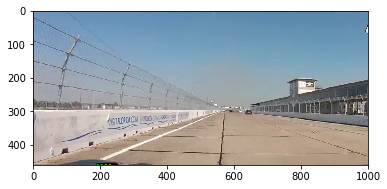

shape: (460, 1000, 3)


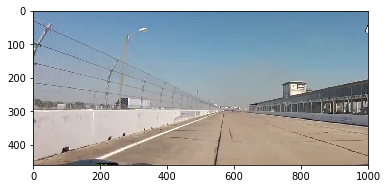

In [43]:
for i in [240, 5059]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(50, 510, 0, 1000, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 5

In [54]:
train_df = pd.read_csv(os.path.join(data_path, 'train5_raw.csv'))
train_df.shape

(4394, 2)

shape: (720, 1280, 3)


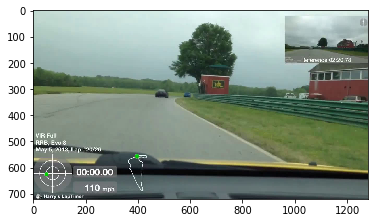

In [233]:
img = imread(train_df['img_path'][30])
print('shape:', img.shape)
imshow(img);

shape: (360, 1280, 3)


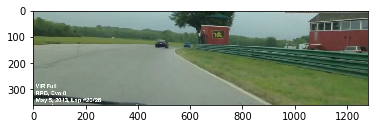

In [234]:
new_img = image_crop(190, 550, 0, 1280, img);
print('shape:', new_img.shape)
imshow(new_img);

In [182]:
test = get_similar_image(img, train_df, 'SSIM', False, 2000, 100, 190, 550, 0, 1280)
test.head()

img_path  img_index      SSIM
4365  ./data/images5/4365.jpg       4365  0.700557
4364  ./data/images5/4364.jpg       4364  0.698391
4371  ./data/images5/4371.jpg       4371  0.697239
4363  ./data/images5/4363.jpg       4363  0.697043
4370  ./data/images5/4370.jpg       4370  0.694448

In [187]:
(4365-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

144.5

In [188]:
weighted_index(test, 5, 'SSIM', False) / get_FPS(os.path.join(data_path, 'train5.mp4'))

145.55317003864636

In [32]:
test = get_similar_image(img, train_df, 'MSE', True, 2000, 100, 190, 550, 0, 1280)
test.head()

img_path  img_index         MSE
4364  ./data/images5/4364.jpg       4364  846.832411
4363  ./data/images5/4363.jpg       4363  850.917564
4365  ./data/images5/4365.jpg       4365  872.846534
4362  ./data/images5/4362.jpg       4362  885.437454
4361  ./data/images5/4361.jpg       4361  911.716420

In [33]:
(4364-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

144.46666666666667

In [34]:
(weighted_index(test, 5, 'MSE', True)-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

144.43420144189034

In [235]:
test = get_similar_image(img, train_df, 'EMD', True, 3000, 100, 190, 550, 0, 1280)
test.head()

img_path  img_index       EMD
3105  ./data/images5/3105.jpg       3105  0.000307
3433  ./data/images5/3433.jpg       3433  0.000311
3120  ./data/images5/3120.jpg       3120  0.000315
3104  ./data/images5/3104.jpg       3104  0.000316
3434  ./data/images5/3434.jpg       3434  0.000327

In [238]:
(3105-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

102.5

In [239]:
(weighted_index(test, 5, 'EMD', True)-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

106.92242579249495

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train5_raw.csv'))
img = imread(train_df['img_path'][30])
test = get_similar_image(img, train_df, 'ORB', False, 2000, 100, 190, 550, 0, 1280)
test.head()
test.to_csv(os.path.join(result_path, 'train5_orb.csv'), index=False)

In [49]:
test = pd.read_csv(os.path.join(result_path, 'train5_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       3894  0.964497
1  /home/idies/workspace/Storage/Cong/persistent/...       3896  0.960674
2  /home/idies/workspace/Storage/Cong/persistent/...       3895  0.960227
3  /home/idies/workspace/Storage/Cong/persistent/...       3866  0.960000
4  /home/idies/workspace/Storage/Cong/persistent/...       3867  0.956757

In [50]:
(3894-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

128.8

In [58]:
(weighted_index(test, 5, 'ORB', True)-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

128.45255857761921

In [55]:
test = pd.read_csv(os.path.join(result_path, 'train5_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       4158  0.666667
1  /home/idies/workspace/Storage/Cong/persistent/...       2528  0.692308
2  /home/idies/workspace/Storage/Cong/persistent/...       3280  0.717949
3  /home/idies/workspace/Storage/Cong/persistent/...       3223  0.717949
4  /home/idies/workspace/Storage/Cong/persistent/...       3221  0.717949

In [56]:
(4158-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

137.6

In [57]:
(weighted_index(test, 5, 'dHash', True)-30) / get_FPS(os.path.join(data_path, 'train5.mp4'))

108.65719591457751

shape: (360, 1280, 3)


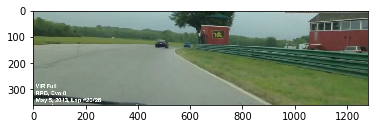

shape: (360, 1280, 3)


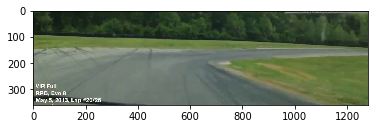

shape: (360, 1280, 3)


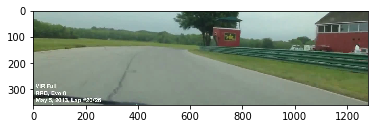

In [55]:
for i in [30, 3894, 4365]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(190, 550, 0, 1280, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 6

In [254]:
train_df = pd.read_csv(os.path.join(data_path, 'train6_raw.csv'))
train_df.shape

(4259, 2)

shape: (720, 1280, 3)


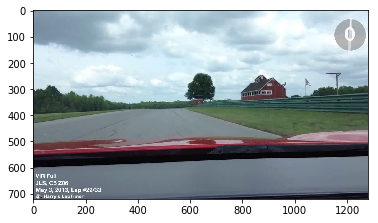

In [255]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

shape: (330, 1280, 3)


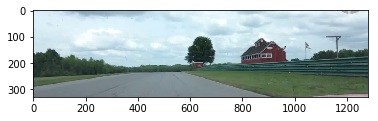

In [256]:
new_img = image_crop(140, 470, 0, 1280, img);
print('shape:', new_img.shape)
imshow(new_img);

In [28]:
test = get_similar_image(img, train_df, 'SSIM', False, 2000, 100, 140, 470, 0, 1280)
test.head()

img_path  img_index      SSIM
4191  ./data/images6/4191.jpg       4191  0.683258
4195  ./data/images6/4195.jpg       4195  0.668464
4194  ./data/images6/4194.jpg       4194  0.665015
4162  ./data/images6/4162.jpg       4162  0.654105
4181  ./data/images6/4181.jpg       4181  0.653591

In [29]:
(4191-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

139.8397

In [50]:
weighted_index(test, 5, 'SSIM', False) / get_FPS(os.path.join(data_path, 'train6.mp4'))

139.63057261756313

In [38]:
test = get_similar_image(img, train_df, 'MSE', True, 2000, 100, 140, 470, 0, 1280)
test.head()

img_path  img_index          MSE
4181  ./data/images6/4181.jpg       4181  1167.542025
4184  ./data/images6/4184.jpg       4184  1197.896967
4179  ./data/images6/4179.jpg       4179  1198.126578
4180  ./data/images6/4180.jpg       4180  1206.303259
4185  ./data/images6/4185.jpg       4185  1221.567494

In [39]:
(4181-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

139.50603333333333

In [40]:
(weighted_index(test, 5, 'MSE', True)-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

139.53226131156808

In [257]:
test = get_similar_image(img, train_df, 'EMD', True, 2000, 100, 140, 470, 0, 1280)
test.head()

img_path  img_index       EMD
4090  ./data/images6/4090.jpg       4090  0.000171
2861  ./data/images6/2861.jpg       2861  0.000181
2862  ./data/images6/2862.jpg       2862  0.000183
4052  ./data/images6/4052.jpg       4052  0.000184
3713  ./data/images6/3713.jpg       3713  0.000189

In [136]:
(4090-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

136.46966666666668

In [137]:
(weighted_index(test, 5, 'EMD', True)-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

138.40083517486784

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train6_raw.csv'))
img = imread(train_df['img_path'][0])
test = get_similar_image(img, train_df, 'ORB', False, 2000, 100, 140, 470, 0, 1280)
test.head()
test.to_csv(os.path.join(result_path, 'train6_orb.csv'), index=False)

In [59]:
test = pd.read_csv(os.path.join(result_path, 'train6_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       4184  0.958333
1  /home/idies/workspace/Storage/Cong/persistent/...       2185  0.951087
2  /home/idies/workspace/Storage/Cong/persistent/...       3091  0.948571
3  /home/idies/workspace/Storage/Cong/persistent/...       3124  0.942708
4  /home/idies/workspace/Storage/Cong/persistent/...       4186  0.941379

In [60]:
(4184-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

139.60613333333333

In [62]:
(weighted_index(test, 5, 'ORB', True)-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

111.90888584905396

In [58]:
test = pd.read_csv(os.path.join(result_path, 'train6_dhash.csv'))
test.head()

img_path  img_index    dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       3410  0.74359
1  /home/idies/workspace/Storage/Cong/persistent/...       3292  0.74359
2  /home/idies/workspace/Storage/Cong/persistent/...       3320  0.74359
3  /home/idies/workspace/Storage/Cong/persistent/...       3407  0.74359
4  /home/idies/workspace/Storage/Cong/persistent/...       2848  0.74359

In [59]:
(3410-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

113.78033333333333

In [60]:
(weighted_index(test, 5, 'dHash', True)-0) / get_FPS(os.path.join(data_path, 'train6.mp4'))

108.62184666666667

shape: (330, 1280, 3)


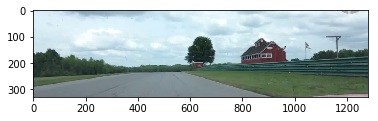

shape: (330, 1280, 3)


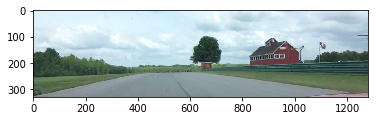

In [73]:
for i in [0, 4191]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(140, 470, 0, 1280, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 7

In [258]:
train_df = pd.read_csv(os.path.join(data_path, 'train7_raw.csv'))
train_df.shape

(8399, 2)

shape: (720, 1280, 3)


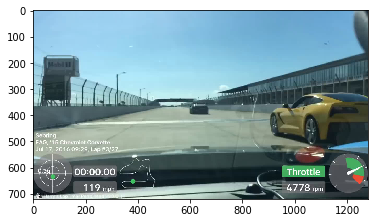

In [259]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

shape: (400, 1280, 3)


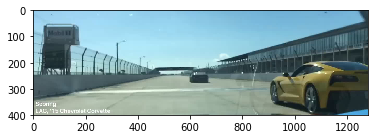

In [260]:
new_img = image_crop(120, 520, 0, 1280, img);
print('shape:', new_img.shape)
imshow(new_img);

In [115]:
test = get_similar_image(img, train_df, 'SSIM', False, 2000, 100, 120, 520, 0, 1280)
test.head()

img_path  img_index      SSIM
4976  ./data/images7/4976.jpg       4976  0.684243
4979  ./data/images7/4979.jpg       4979  0.681736
4987  ./data/images7/4987.jpg       4987  0.680693
4974  ./data/images7/4974.jpg       4974  0.678944
4980  ./data/images7/4980.jpg       4980  0.678431

In [120]:
(4976-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

171.58620644256592

In [132]:
weighted_index(test, 40, 'SSIM', False) / get_FPS(os.path.join(data_path, 'train7.mp4'))

174.84299753573356

In [44]:
test = get_similar_image(img, train_df, 'MSE', True, 2000, 100, 120, 520, 0, 1280)
test.head()

img_path  img_index          MSE
5053  ./data/images7/5053.jpg       5053  1897.557632
4978  ./data/images7/4978.jpg       4978  1923.896822
4980  ./data/images7/4980.jpg       4980  1927.890341
4976  ./data/images7/4976.jpg       4976  1946.782907
4979  ./data/images7/4979.jpg       4979  1951.303948

In [45]:
(5053-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

174.24137884933393

In [46]:
(weighted_index(test, 5, 'MSE', True)-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

172.18801735159238

In [261]:
test = get_similar_image(img, train_df, 'EMD', True, 2000, 100, 120, 520, 0, 1280)
test.head()

img_path  img_index       EMD
2153  ./data/images7/2153.jpg       2153  0.000121
6840  ./data/images7/6840.jpg       6840  0.000136
6836  ./data/images7/6836.jpg       6836  0.000140
6834  ./data/images7/6834.jpg       6834  0.000146
2057  ./data/images7/2057.jpg       2057  0.000165

In [262]:
(2153-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

74.24137911391568

In [263]:
(weighted_index(test, 5, 'EMD', True)-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

170.37165643794157

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train7_raw.csv'))
img = imread(train_df['img_path'][0])
test = get_similar_image(img, train_df, 'ORB', False, 2000, 100, 120, 520, 0, 1280)
test.head()
test.to_csv(os.path.join(result_path, 'train7_orb.csv'), index=False)

In [63]:
test = pd.read_csv(os.path.join(result_path, 'train7_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       4978  0.887417
1  /home/idies/workspace/Storage/Cong/persistent/...       6399  0.866029
2  /home/idies/workspace/Storage/Cong/persistent/...       6039  0.860963
3  /home/idies/workspace/Storage/Cong/persistent/...       4522  0.851163
4  /home/idies/workspace/Storage/Cong/persistent/...       5113  0.850746

In [64]:
(4978-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

171.65517195962482

In [65]:
(weighted_index(test, 5, 'ORB', True)-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

186.51233364329144

In [61]:
test = pd.read_csv(os.path.join(result_path, 'train7_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       7271  0.692308
1  /home/idies/workspace/Storage/Cong/persistent/...       3675  0.692308
2  /home/idies/workspace/Storage/Cong/persistent/...       3204  0.717949
3  /home/idies/workspace/Storage/Cong/persistent/...       2699  0.717949
4  /home/idies/workspace/Storage/Cong/persistent/...       6749  0.717949

In [73]:
(7271 + 3675) / 2

5473.0

In [74]:
(5473.0-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

188.72413743170483

In [75]:
(weighted_index(test, 5, 'dHash', True)-0) / get_FPS(os.path.join(data_path, 'train7.mp4'))

163.1240871596443

shape: (400, 1280, 3)


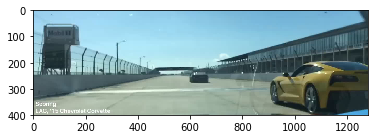

shape: (400, 1280, 3)


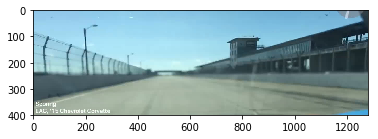

In [119]:
for i in [0, 4976]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(120, 520, 0, 1280, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 8

In [27]:
train_df = pd.read_csv(os.path.join(data_path, 'train8_raw.csv'))
train_df.shape

(4544, 2)

shape: (360, 480, 3)


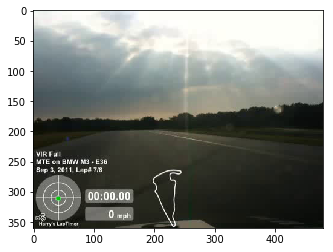

In [28]:
img = imread(train_df['img_path'][0])
print('shape:', img.shape)
imshow(img);

shape: (80, 480, 3)


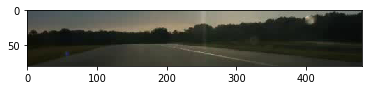

In [180]:
new_img = image_crop(150, 230, 0, 480, img);
print('shape:', new_img.shape)
imshow(new_img);

In [53]:
test = get_similar_image(img, train_df, 'SSIM', False, 4000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index      SSIM
4414  ./data/images8/4414.jpg       4414  0.678274
4413  ./data/images8/4413.jpg       4413  0.677817
4415  ./data/images8/4415.jpg       4415  0.677731
4409  ./data/images8/4409.jpg       4409  0.677450
4419  ./data/images8/4419.jpg       4419  0.676715

In [56]:
(4414-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

147.13333333333333

In [57]:
weighted_index(test, 5, 'SSIM', False) / get_FPS(os.path.join(data_path, 'train8.webm'))

147.13329632079115

In [50]:
test = get_similar_image(img, train_df, 'MSE', True, 4000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index         MSE
4350  ./data/images8/4350.jpg       4350  924.783675
4351  ./data/images8/4351.jpg       4351  949.402516
4352  ./data/images8/4352.jpg       4352  952.585673
4349  ./data/images8/4349.jpg       4349  956.133323
4354  ./data/images8/4354.jpg       4354  956.623606

In [51]:
(4350-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

145.0

In [52]:
(weighted_index(test, 5, 'MSE', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

145.03973201644806

In [22]:
test = get_similar_image(img, train_df, 'EMD', True, 4000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index       EMD
4541  /home/idies/workspace/Storage/Cong/persistent/...       4541  0.000232
4510  /home/idies/workspace/Storage/Cong/persistent/...       4510  0.000272
4507  /home/idies/workspace/Storage/Cong/persistent/...       4507  0.000303
4537  /home/idies/workspace/Storage/Cong/persistent/...       4537  0.000305
4508  /home/idies/workspace/Storage/Cong/persistent/...       4508  0.000305

In [23]:
(4541-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

151.36666666666667

In [24]:
(weighted_index(test, 5, 'EMD', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

150.71807390624443

In [40]:
train_df = pd.read_csv(os.path.join(data_path, 'train8_raw.csv'))
img = imread(train_df['img_path'][0])
test = get_similar_image(img, train_df, 'ORB', False, 4000, 100, 100, 230, 0, 480)
test.head()
test.to_csv(os.path.join(result_path, 'train8_orb.csv'), index=False)

In [66]:
test = pd.read_csv(os.path.join(result_path, 'train8_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       4535  1.000000
1  /home/idies/workspace/Storage/Cong/persistent/...       4519  0.989899
2  /home/idies/workspace/Storage/Cong/persistent/...       4542  0.988506
3  /home/idies/workspace/Storage/Cong/persistent/...       4543  0.979798
4  /home/idies/workspace/Storage/Cong/persistent/...       4536  0.979381

In [67]:
(4535-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

151.16666666666666

In [68]:
(weighted_index(test, 5, 'ORB', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

151.16735216788499

In [76]:
test = pd.read_csv(os.path.join(result_path, 'train8_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       4211  0.692308
1  /home/idies/workspace/Storage/Cong/persistent/...       4303  0.717949
2  /home/idies/workspace/Storage/Cong/persistent/...       4168  0.717949
3  /home/idies/workspace/Storage/Cong/persistent/...       4262  0.717949
4  /home/idies/workspace/Storage/Cong/persistent/...       4264  0.769231

In [77]:
(4211-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

140.36666666666667

In [68]:
(weighted_index(test, 5, 'dHash', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

151.16735216788499

shape: (80, 480, 3)


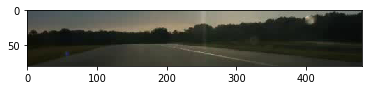

In [36]:
new_img = image_crop(150, 230, 0, 480, img)
print('shape:', new_img.shape)
imshow(new_img);

shape: (360, 480, 3)


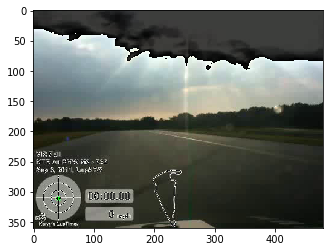

In [50]:
img = change_brightness(img, 1.25)
print('shape:', img.shape)
imshow(img);

In [51]:
test = get_similar_image(img, train_df, 'SSIM', False, 3000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index      SSIM
3234  /home/idies/workspace/Storage/Cong/persistent/...       3234  0.677817
3242  /home/idies/workspace/Storage/Cong/persistent/...       3242  0.676176
3239  /home/idies/workspace/Storage/Cong/persistent/...       3239  0.675826
3232  /home/idies/workspace/Storage/Cong/persistent/...       3232  0.674714
3238  /home/idies/workspace/Storage/Cong/persistent/...       3238  0.674071

In [57]:
(3234-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

107.8

In [57]:
weighted_index(test, 5, 'SSIM', False) / get_FPS(os.path.join(data_path, 'train8.webm'))

147.13329632079115

In [52]:
test = get_similar_image(img, train_df, 'MSE', True, 3000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index  \
3242  /home/idies/workspace/Storage/Cong/persistent/...       3242   
3234  /home/idies/workspace/Storage/Cong/persistent/...       3234   
3239  /home/idies/workspace/Storage/Cong/persistent/...       3239   
3241  /home/idies/workspace/Storage/Cong/persistent/...       3241   
3232  /home/idies/workspace/Storage/Cong/persistent/...       3232   

              MSE  
3242  1105.479348  
3234  1108.462671  
3239  1110.673478  
3241  1115.014151  
3232  1123.640278

In [56]:
(3242-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

108.06666666666666

In [52]:
(weighted_index(test, 5, 'MSE', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

145.03973201644806

In [54]:
test = get_similar_image(img, train_df, 'EMD', True, 3000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index       EMD
4531  /home/idies/workspace/Storage/Cong/persistent/...       4531  0.000120
4532  /home/idies/workspace/Storage/Cong/persistent/...       4532  0.000132
4533  /home/idies/workspace/Storage/Cong/persistent/...       4533  0.000135
4529  /home/idies/workspace/Storage/Cong/persistent/...       4529  0.000138
4536  /home/idies/workspace/Storage/Cong/persistent/...       4536  0.000147

In [55]:
(4531-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

151.03333333333333

In [24]:
(weighted_index(test, 5, 'EMD', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

150.71807390624443

In [53]:
test = get_similar_image(img, train_df, 'ORB', False, 3000, 100, 100, 230, 0, 480)
test.head()

img_path  img_index  ORB
3915  /home/idies/workspace/Storage/Cong/persistent/...       3915  1.0
3987  /home/idies/workspace/Storage/Cong/persistent/...       3987  1.0
3912  /home/idies/workspace/Storage/Cong/persistent/...       3912  1.0
3913  /home/idies/workspace/Storage/Cong/persistent/...       3913  1.0
3916  /home/idies/workspace/Storage/Cong/persistent/...       3916  1.0

In [58]:
(3915-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

130.5

In [68]:
(weighted_index(test, 5, 'ORB', True)-0) / get_FPS(os.path.join(data_path, 'train8.webm'))

151.16735216788499

shape: (80, 480, 3)


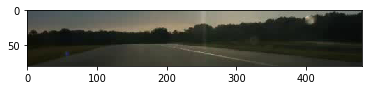

shape: (80, 480, 3)


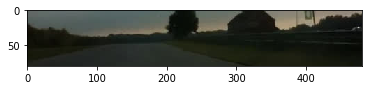

In [55]:
for i in [0, 4414]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(150, 230, 0, 480, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 9

In [25]:
train_df = pd.read_csv(os.path.join(data_path, 'train9_raw.csv'))
train_df.shape

(3974, 2)

shape: (720, 1280, 3)


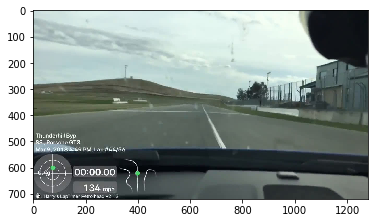

In [26]:
img = imread(train_df['img_path'][291])
print('shape:', img.shape)
imshow(img);

shape: (350, 1280, 3)


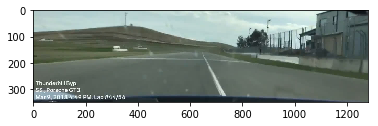

In [187]:
new_img = image_crop(200, 550, 0, 1280, img);
print('shape:', new_img.shape)
imshow(new_img);

In [82]:
test = get_similar_image(img, train_df, 'SSIM', False, 2300, 100, 200, 550, 0, 1280)
test.head()

img_path  img_index      SSIM
3681  ./data/images9/3681.jpg       3681  0.805300
3678  ./data/images9/3678.jpg       3678  0.774452
3684  ./data/images9/3684.jpg       3684  0.757206
3679  ./data/images9/3679.jpg       3679  0.734741
3683  ./data/images9/3683.jpg       3683  0.727796

In [87]:
(3681-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

116.89653799698037

In [91]:
(weighted_index(test, 5, 'SSIM', False)-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

116.89594239161036

In [61]:
test = get_similar_image(img, train_df, 'MSE', True, 2300, 100, 200, 550, 0, 1280)
test.head()

img_path  img_index         MSE
3681  ./data/images9/3681.jpg       3681  301.664118
3678  ./data/images9/3678.jpg       3678  452.143151
3679  ./data/images9/3679.jpg       3679  572.204219
3682  ./data/images9/3682.jpg       3682  721.221265
3677  ./data/images9/3677.jpg       3677  733.572228

In [63]:
(3681-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

116.89653799698037

In [64]:
(weighted_index(test, 5, 'MSE', True)-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

116.84770153113143

In [27]:
test = get_similar_image(img, train_df, 'EMD', True, 2300, 100, 200, 550, 0, 1280)
test.head()

img_path  img_index       EMD
3138  /home/idies/workspace/Storage/Cong/persistent/...       3138  0.000203
3102  /home/idies/workspace/Storage/Cong/persistent/...       3102  0.000207
3669  /home/idies/workspace/Storage/Cong/persistent/...       3669  0.000216
3142  /home/idies/workspace/Storage/Cong/persistent/...       3142  0.000220
3105  /home/idies/workspace/Storage/Cong/persistent/...       3105  0.000237

In [28]:
(3138-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

98.17240226472067

In [29]:
(weighted_index(test, 5, 'EMD', True)-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

101.3975067764542

In [41]:
train_df = pd.read_csv(os.path.join(data_path, 'train9_raw.csv'))
img = imread(train_df['img_path'][291])
test = get_similar_image(img, train_df, 'ORB', False, 2300, 100, 200, 550, 0, 1280)
test.head()
test.to_csv(os.path.join(result_path, 'train9_orb.csv'), index=False)

In [69]:
test = pd.read_csv(os.path.join(result_path, 'train9_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       2473  0.965368
1  /home/idies/workspace/Storage/Cong/persistent/...       3679  0.964968
2  /home/idies/workspace/Storage/Cong/persistent/...       2351  0.960526
3  /home/idies/workspace/Storage/Cong/persistent/...       3680  0.957187
4  /home/idies/workspace/Storage/Cong/persistent/...       2463  0.956522

In [72]:
(2473-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

75.24137047475256

In [74]:
(weighted_index(test, 5, 'ORB', True)-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

90.96898428571662

In [78]:
test = pd.read_csv(os.path.join(result_path, 'train9_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       3888  0.692308
1  /home/idies/workspace/Storage/Cong/persistent/...       3644  0.717949
2  /home/idies/workspace/Storage/Cong/persistent/...       2991  0.717949
3  /home/idies/workspace/Storage/Cong/persistent/...       2624  0.743590
4  /home/idies/workspace/Storage/Cong/persistent/...       3705  0.743590

In [79]:
(3888-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

124.03446819325616

In [80]:
(weighted_index(test, 5, 'dHash', True)-291) / get_FPS(os.path.join(data_path, 'train9.mp4'))

106.41781393718554

shape: (350, 1280, 3)


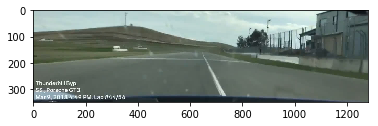

shape: (350, 1280, 3)


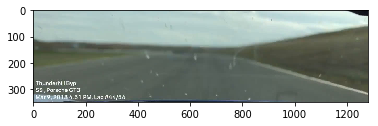

In [71]:
for i in [291, 2473]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(200, 550, 0, 1280, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

## Video 10

In [30]:
train_df = pd.read_csv(os.path.join(data_path, 'train10_raw.csv'))
train_df.shape

(5254, 2)

shape: (712, 1280, 3)


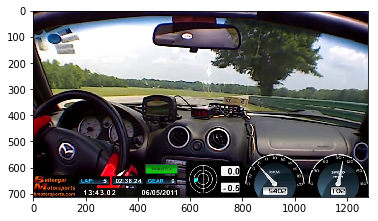

In [193]:
img = imread(train_df['img_path'][594])
print('shape:', img.shape)
imshow(img);

shape: (240, 1280, 3)


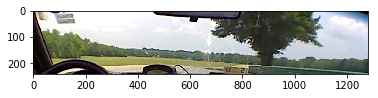

In [194]:
new_img = image_crop(120, 360, 0, 1280, img);
print('shape:', new_img.shape)
imshow(new_img);

In [200]:
test = get_similar_image(img, train_df, 'SSIM', False, 2500, 100, 120, 360, 0, 1280)
test.head()

img_path  img_index      SSIM
5141  ./data/images10/5141.jpg       5141  0.727688
5140  ./data/images10/5140.jpg       5140  0.715676
5142  ./data/images10/5142.jpg       5142  0.712906
5138  ./data/images10/5138.jpg       5138  0.705864
5139  ./data/images10/5139.jpg       5139  0.702371

In [203]:
(5141-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

151.71823333333333

In [205]:
(weighted_index(test, 5, 'SSIM', False)-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

151.68523549151382

In [69]:
test = get_similar_image(img, train_df, 'MSE', True, 2500, 100, 120, 360, 0, 1280)
test.head()

img_path  img_index          MSE
5141  ./data/images10/5141.jpg       5141   607.865970
5140  ./data/images10/5140.jpg       5140   748.906621
5142  ./data/images10/5142.jpg       5142   760.291933
5139  ./data/images10/5139.jpg       5139   956.008129
5143  ./data/images10/5143.jpg       5143  1003.745449

In [70]:
(5141-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

151.71823333333333

In [71]:
(weighted_index(test, 5, 'MSE', True)-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

151.71760426242903

In [31]:
test = get_similar_image(img, train_df, 'EMD', True, 2500, 100, 120, 360, 0, 1280)
test.head()

img_path  img_index       EMD
5237  /home/idies/workspace/Storage/Cong/persistent/...       5237  0.000475
5231  /home/idies/workspace/Storage/Cong/persistent/...       5231  0.000488
5236  /home/idies/workspace/Storage/Cong/persistent/...       5236  0.000511
5230  /home/idies/workspace/Storage/Cong/persistent/...       5230  0.000515
5240  /home/idies/workspace/Storage/Cong/persistent/...       5240  0.000516

In [32]:
(5237-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

154.92143333333334

In [33]:
(weighted_index(test, 5, 'EMD', True)-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

154.8478490436721

In [42]:
train_df = pd.read_csv(os.path.join(data_path, 'train10_raw.csv'))
img = imread(train_df['img_path'][594])
test = get_similar_image(img, train_df, 'ORB', False, 2500, 100, 120, 360, 0, 1280)
test.head()
test.to_csv(os.path.join(result_path, 'train10_orb.csv'), index=False)

In [75]:
test = pd.read_csv(os.path.join(result_path, 'train10_orb.csv'))
test.head()

img_path  img_index       ORB
0  /home/idies/workspace/Storage/Cong/persistent/...       5142  0.943709
1  /home/idies/workspace/Storage/Cong/persistent/...       5141  0.936709
2  /home/idies/workspace/Storage/Cong/persistent/...       5143  0.935374
3  /home/idies/workspace/Storage/Cong/persistent/...       5144  0.932862
4  /home/idies/workspace/Storage/Cong/persistent/...       5138  0.913669

In [76]:
(5142-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

151.7516

In [77]:
(weighted_index(test, 5, 'ORB', True)-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

151.73770963866474

In [81]:
test = pd.read_csv(os.path.join(result_path, 'train10_dhash.csv'))
test.head()

img_path  img_index     dHash
0  /home/idies/workspace/Storage/Cong/persistent/...       4976  0.710526
1  /home/idies/workspace/Storage/Cong/persistent/...       4859  0.736842
2  /home/idies/workspace/Storage/Cong/persistent/...       4198  0.736842
3  /home/idies/workspace/Storage/Cong/persistent/...       4778  0.763158
4  /home/idies/workspace/Storage/Cong/persistent/...       3712  0.763158

In [82]:
(4976-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

146.21273333333335

In [83]:
(weighted_index(test, 5, 'dHash', True)-594) / get_FPS(os.path.join(data_path, 'train10.mp4'))

130.72119042844903

shape: (240, 1280, 3)


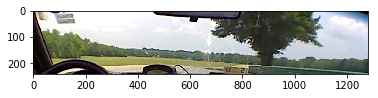

shape: (240, 1280, 3)


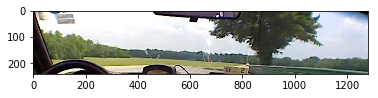

In [202]:
for i in [594, 5141]:
    img = imread(train_df['img_path'][i])
    new_img = image_crop(120, 360, 0, 1280, img)
    print('shape:', new_img.shape)
    plt.imshow(new_img);
    plt.show()

# Lap Time

In [22]:
def lap_time(initial_idx, sample, sample_frac, fps, topn, df, method, ascending, h1, h2, l1, l2, seed):
    np.random.seed(seed)
    results_dict = {}
    prior = initial_idx + np.floor(prior_time * fps).astype(int)
    img_idxs = np.random.choice(np.arange(initial_idx, np.floor(initial_idx+fps).astype(int)), np.round(sample*sample_frac).astype(int), replace=False).tolist() + np.random.choice(np.arange(np.ceil(initial_idx+fps).astype(int), np.floor(initial_idx+2*fps).astype(int)), np.round(sample*(1-sample_frac)).astype(int), replace=False).tolist()
    
    for idx in img_idxs:
        img = imread(df['img_path'][idx])
        similar_imgs = get_similar_image(img, df, method, ascending, prior, h1, h2, l1, l2)
        results_dict[idx] = [df['img_path'][idx], idx, (similar_imgs['img_index'].iloc[0]-idx)/fps, (weighted_index(similar_imgs, topn, method, ascending)-idx)/fps]
    
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    results_df.columns = ['img_path', 'img_index', 'lap_time', 'weighted_lap_time']
    return results_df

In [95]:
lap_time_video4 = pd.DataFrame()
files = os.listdir('./result')
for i in files:
    if re.search('video4', i) is not None:
        print(os.path.join('./result', i))
        lap_time_video4 = lap_time_video4.append(pd.read_csv(os.path.join('./result', i)))

./result/lap_time_video4_sample9_SSIM.csv
./result/lap_time_video4_sample1.csv
./result/lap_time_video4_sample2.csv
./result/lap_time_video4_sample6_SSIM.csv
./result/lap_time_video4_sample6_EMD.csv
./result/lap_time_video4_sample8.csv
./result/lap_time_video4_sample7_SSIM.csv
./result/lap_time_video4_sample7_EMD.csv
./result/lap_time_video4_sample8_EMD.csv
./result/lap_time_video4_sample6.csv
./result/lap_time_video4_sample7.csv
./result/lap_time_video4_sample9.csv
./result/lap_time_video4_sample10.csv
./result/lap_time_video4_sample8_SSIM.csv


/home/idies/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [105]:
lap_time_video4.head()

elapsedTime  img_index                                           img_path  \
0  15378.747506        251  /home/idies/workspace/Storage/Cong/persistent/...   
1  15378.747506        261  /home/idies/workspace/Storage/Cong/persistent/...   
2  15378.747506        267  /home/idies/workspace/Storage/Cong/persistent/...   
3  15378.747506        255  /home/idies/workspace/Storage/Cong/persistent/...   
4  15378.747506        260  /home/idies/workspace/Storage/Cong/persistent/...   

     lap_time method  sample  weighted_lap_time  
0  160.793967   SSIM       9         160.879438  
1  160.927433   SSIM       9         160.967495  
2  161.127633   SSIM       9         161.047799  
3  161.127633   SSIM       9         161.100968  
4  160.860700   SSIM       9         160.953980

In [110]:
aggregations = {
    'lap_time': 'mean',
    'weighted_lap_time': 'mean',
    'elapsedTime': 'mean'
}

In [112]:
temp = lap_time_video4.groupby(['sample', 'method'], as_index=False).agg(aggregations)
temp

sample method    lap_time  weighted_lap_time   elapsedTime
0        1    EMD  160.426933         161.077868   3545.743358
1        1    MSE  160.793967         160.880270    209.194302
2        1    ORB  161.194367         161.167966    198.574581
3        1   SSIM  160.793967         160.879438   1642.818146
4        2    EMD  161.010850         161.223479   7022.658311
5        2    MSE  160.960800         160.950914    398.932084
6        2    ORB  161.161000         161.137639    395.705481
7        2   SSIM  160.860700         160.923467   3275.013483
8        6    EMD  161.216611         161.134238  21158.146001
9        6    MSE  161.060900         161.008139    964.589221
10       6    ORB  161.138756         161.109026   1234.984159
11       6   SSIM  160.994167         156.280712  10432.703670
12       7    EMD  161.213433         161.150817  24568.711471
13       7    MSE  161.070433         161.014298   1108.288727
14       7    ORB  161.137167         161.107020   1411.260319
15       7   SSIM  161.013233         156.957002  12089.631563
16       8    EMD  161.202708         161.149607           NaN
17       8    MSE  161.069242         161.024348   1187.320540
18       8    ORB  161.135975         161.101377   1585.747223
19       8   SSIM  161.027533         155.720924  13830.615713
20       9    MSE  161.072022         161.037065   1322.912063
21       9    ORB  161.138756         161.100661   1766.051252
22       9   SSIM  161.038656         156.320102  15378.747506
23      10    MSE  161.077583         161.039658   1490.348057
24      10    ORB  161.137643         161.096096   1920.582440

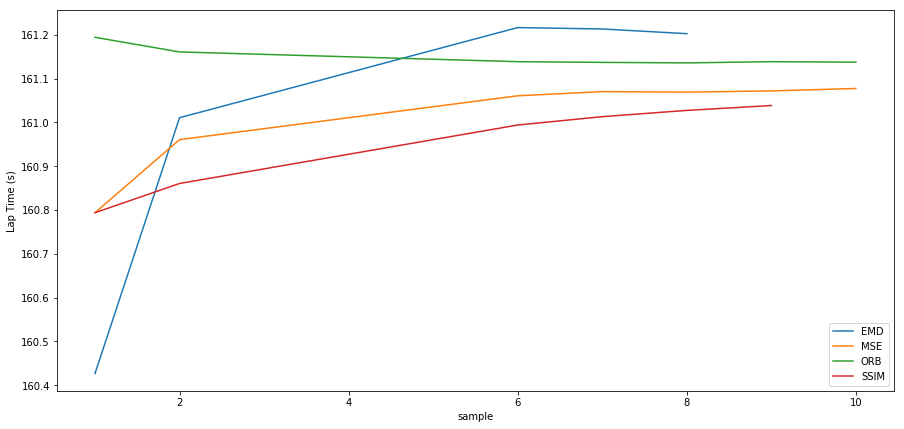

In [128]:
fig, ax = subplots(figsize=(15,7))
temp.groupby('method')['lap_time'].plot(ax=ax, legend=True);
ylabel('Lap Time (s)');

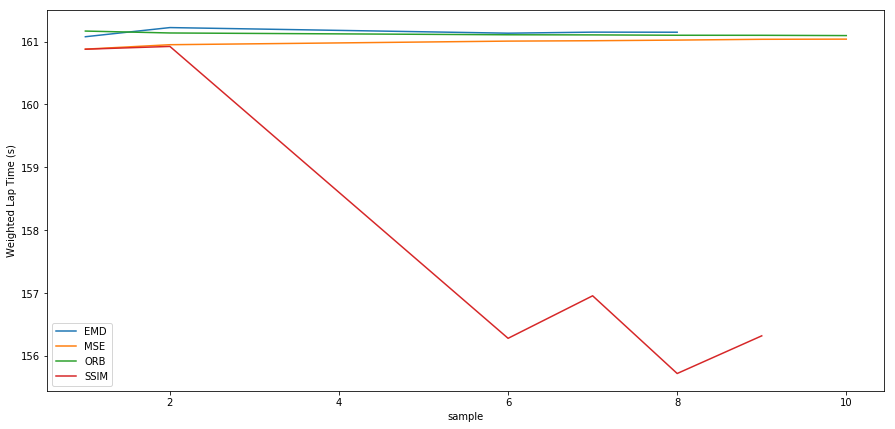

In [129]:
fig, ax = subplots(figsize=(15,7))
temp.groupby('method')['weighted_lap_time'].plot(ax=ax, legend=True);
ylabel('Weighted Lap Time (s)');

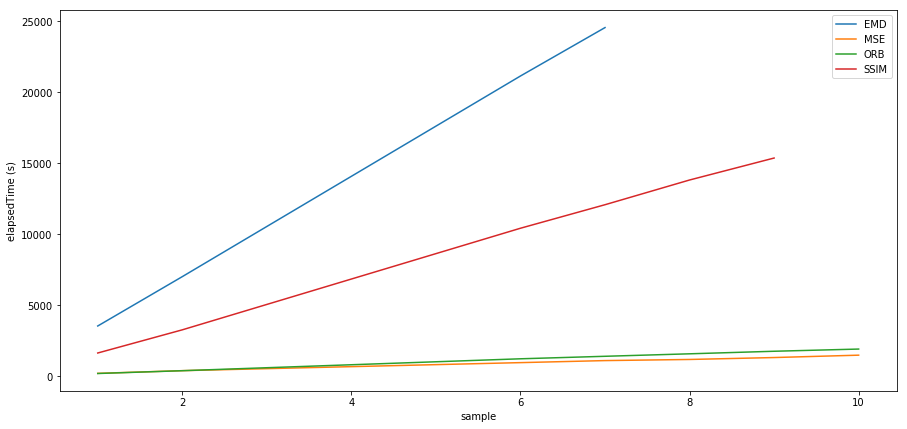

In [130]:
fig, ax = subplots(figsize=(15,7))
temp.groupby('method')['elapsedTime'].plot(ax=ax, legend=True);
ylabel('elapsedTime (s)');